In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
res = pd.read_csv("results.csv")
res

,Unnamed: 0,trial_id,iteration,test_metric,strategy,seed,score
0,0,a036e_00000,0,0.520176,least_confidence,1,212.963585
1,1,a036e_00000,1,0.630827,least_confidence,1,212.963585
2,2,a036e_00000,2,0.545419,least_confidence,1,212.963585
3,3,a036e_00000,3,0.827278,least_confidence,1,212.963585
4,4,a036e_00000,4,0.716398,least_confidence,1,212.963585
...,...,...,...,...,...,...,...
5517,5517,a036e_00024,246,0.500000,random,5,156.875567
5518,5518,a036e_00024,247,0.500000,random,5,156.875567
5519,5519,a036e_00024,248,0.500000,random,5,156.875567
5520,5520,a036e_00024,249,0.580764,random,5,156.875567


In [3]:
res[res.strategy=="random"]

,Unnamed: 0,trial_id,iteration,test_metric,strategy,seed,score
4267,4267,a036e_00020,0,0.500000,random,1,135.331505
4268,4268,a036e_00020,1,0.499991,random,1,135.331505
4269,4269,a036e_00020,2,0.522280,random,1,135.331505
4270,4270,a036e_00020,3,0.520176,random,1,135.331505
4271,4271,a036e_00020,4,0.540219,random,1,135.331505
...,...,...,...,...,...,...,...
5517,5517,a036e_00024,246,0.500000,random,5,156.875567
5518,5518,a036e_00024,247,0.500000,random,5,156.875567
5519,5519,a036e_00024,248,0.500000,random,5,156.875567
5520,5520,a036e_00024,249,0.580764,random,5,156.875567


In [4]:
aucs = res.drop_duplicates(subset=["strategy","seed"])
agg = aucs.groupby("strategy")["score"]
mean_aucs, std_aucs = agg.mean(), agg.std()
aucs = pd.concat((mean_aucs, std_aucs), axis=1)
aucs.columns = ["avg", "stdv"]
aucs["score"] = aucs.apply(lambda row: f"{row.avg:.2f} ± {row.stdv:.2f}"  ,axis=1)
label_to_auc = dict(zip(aucs.index, aucs["score"]))

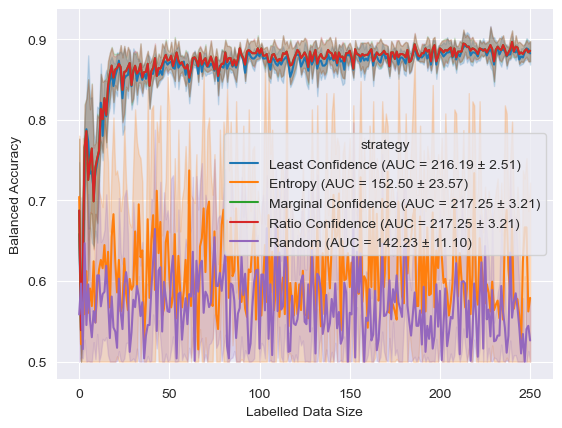

In [5]:
sns.set_style("darkgrid")

sns.lineplot(data=res, x="iteration", y="test_metric", hue="strategy")
plt.ylabel("Balanced Accuracy")
plt.xlabel("Labelled Data Size")
# _ = plt.xticks(np.arange(0,26), np.arange(0,26)*10 + 20, rotation=45)

ax = plt.gca()
legend = ax.get_legend()
for text in legend.get_texts():
    label = text.get_text()
    new_label = f"{label.replace('_', ' ').title()} (AUC = {label_to_auc[label]})"
    text.set_text(new_label)
    

for spine in ax.spines.values():
    spine.set_visible(False)